# Problem Statement

We would like to build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df= pd.read_excel("LCDataDictionary.xlsx")

In [3]:
df

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,zip_code,The first 3 numbers of the zip code provided b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#pd.set_option("display.max_rows", None)
df["Description"].unique

<bound method Series.unique of 0      The number of accounts on which the borrower i...
1             Number of trades opened in past 24 months.
2      The state provided by the borrower in the loan...
3                  Balance to credit limit on all trades
4      The self-reported annual income provided by th...
                             ...                        
112    Indicates if income was verified by LC, not ve...
113    Indicates if the co-borrowers' joint income wa...
114    The first 3 numbers of the zip code provided b...
115                                                  NaN
116    * Employer Title replaces Employer Name for al...
Name: Description, Length: 117, dtype: object>

In [5]:
df2 = pd.read_csv("loans_2007.csv")

C:\Users\Menzo\anaconda3\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df2.shape

(42538, 52)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'In Grace Period'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'Late (16-30 days)'),
  Text(6, 0, 'Default'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

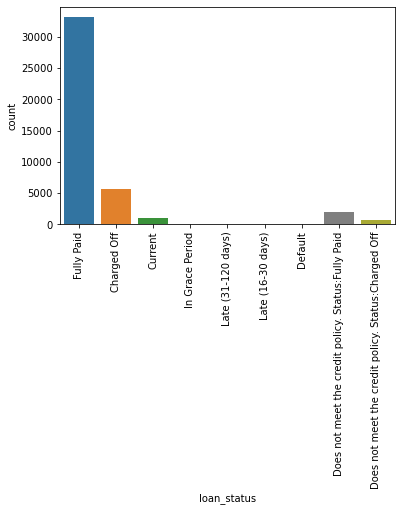

In [7]:
sns.countplot(x='loan_status',data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'In Grace Period'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'Late (16-30 days)'),
  Text(6, 0, 'Default'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

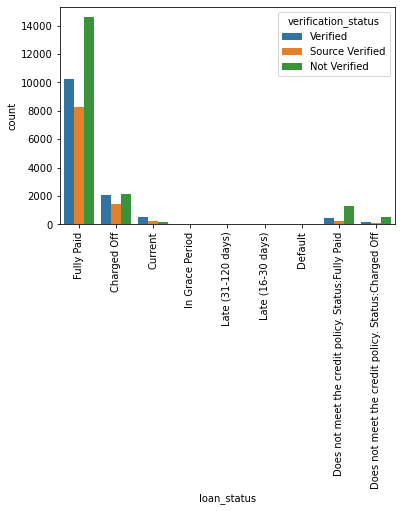

In [8]:
sns.countplot(x='loan_status',data=df2,hue='verification_status')
plt.xticks(rotation=90)

In [9]:
df2.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,...,99.760718,13.858267,2610.756511,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686446,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,...,716.220266,159.360372,4385.636417,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,...,0.000000,0.000000,211.460000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,...,0.000000,0.000000,526.150000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,...,0.000000,0.000000,3165.450000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [11]:
df2.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal           

# cleaning

In [12]:
df3=df2.dropna(axis=0)

In [13]:
df3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38433 entries, 1 to 42386
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38433 non-null  object 
 1   member_id                   38433 non-null  float64
 2   loan_amnt                   38433 non-null  float64
 3   funded_amnt                 38433 non-null  float64
 4   funded_amnt_inv             38433 non-null  float64
 5   term                        38433 non-null  object 
 6   int_rate                    38433 non-null  object 
 7   installment                 38433 non-null  float64
 8   grade                       38433 non-null  object 
 9   sub_grade                   38433 non-null  object 
 10  emp_title                   38433 non-null  object 
 11  emp_length                  38433 non-null  object 
 12  home_ownership              38433 non-null  object 
 13  annual_inc                  384

In [15]:
df3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [16]:
df3.select_dtypes(["object"]).columns

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [17]:
df3= df3.set_index("id")

In [18]:
#dummies = pd.get_dummies(df3[['verification_status', 'application_type','initial_list_status','purpose','emp_title','emp_length','pymnt_plan','addr_state','revol_util','last_credit_pull_d','application_type' ]],drop_first=True)
df3 = df3.drop(['verification_status', 'application_type','initial_list_status','purpose','emp_title','emp_length','pymnt_plan','addr_state','revol_util','last_credit_pull_d','application_type'],axis=1)
#df3 = pd.concat([df3,dummies],axis=1)

In [19]:
df3['term'] = df3['term'].apply(lambda term: int(term[:3]))

In [20]:
df3 = df3.drop(['grade','issue_d'] ,axis=1)

In [21]:
subgrade_dummies = pd.get_dummies(df3['sub_grade'],drop_first=True)
df3 = pd.concat([df3.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [22]:
df3['home_ownership'].value_counts()

RENT        18290
MORTGAGE    17309
OWN          2704
OTHER         130
Name: home_ownership, dtype: int64

In [23]:
df3['home_ownership']=df3['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df3['home_ownership'],drop_first=True)
df3 = df3.drop('home_ownership',axis=1)
df3 = pd.concat([df3,dummies],axis=1)

In [24]:
dummies = pd.get_dummies(df3['zip_code'],drop_first=True)
df3 = df3.drop('zip_code',axis=1)
df3 = pd.concat([df3,dummies],axis=1)

In [25]:
df3['earliest_cr_year'] = df3['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df3 = df3.drop('earliest_cr_line',axis=1)

In [26]:
df3.select_dtypes(["object"]).columns

Index(['int_rate', 'loan_status', 'title', 'last_pymnt_d'], dtype='object')

In [27]:
df3['int_rate'] = df3['int_rate'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

In [28]:
df3 = df3.drop(['title','last_pymnt_d'],axis=1)

# TEST AND TRAIN 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df = df3.drop(["loan_status","term"], axis=1)

In [31]:
df.shape

(38433, 884)

In [40]:
y= df["total_pymnt"]
x= df.drop("total_pymnt", axis = 1).values

In [33]:
y

id
1077430     1008.710000
1076863    12231.890000
1075358     3581.120000
1075269     5632.210000
1069639    10137.840008
               ...     
150070      5642.350000
137757      1878.900000
137749     11185.338154
136976      2981.700000
133891      5715.383088
Name: total_pymnt, Length: 38433, dtype: float64

In [34]:
print(len(df))

38433


time for training

In [41]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state=0)


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# modeling with tensorflow

In [37]:
import tensorflow

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [44]:

model = Sequential()



# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(x_test, y_test), 
          )

Epoch 1/25
121/121 [==============================] - 11s 38ms/step - loss: -776600.1875 - val_loss: -4391283.0000
Epoch 2/25
121/121 [==============================] - 3s 28ms/step - loss: -37818724.0000 - val_loss: -112231032.0000
Epoch 3/25
121/121 [==============================] - 3s 27ms/step - loss: -347963968.0000 - val_loss: -732229952.0000
Epoch 4/25
121/121 [==============================] - 3s 28ms/step - loss: -1529778944.0000 - val_loss: -2640626688.0000
Epoch 5/25
121/121 [==============================] - 3s 27ms/step - loss: -4490540544.0000 - val_loss: -6864367616.0000
Epoch 6/25
121/121 [==============================] - 3s 27ms/step - loss: -10333498368.0000 - val_loss: -14609514496.0000
Epoch 7/25
121/121 [==============================] - 3s 27ms/step - loss: -20402665472.0000 - val_loss: -27387932672.0000
Epoch 8/25
121/121 [==============================] - 3s 27ms/step - loss: -36392546304.0000 - val_loss: -46871011328.0000
Epoch 9/25
121/121 [=================

# evaluating model

In [46]:
from tensorflow.keras.models import load_model

In [48]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

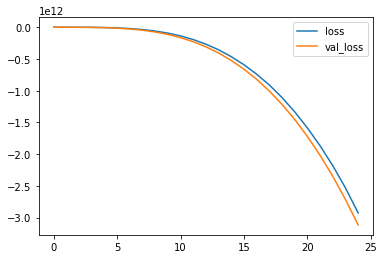

In [49]:
losses[['loss','val_loss']].plot()